DOMAIN:


Automobile


CONTEXT:


The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 continuous attributes


DATA DESCRIPTION:


The data concerns city-cycle fuel consumption in miles per gallon
Attribute Information:


1. mpg: continuous


2. cylinders(cyl): multi-valued discrete


3. displacement(disp): continuous


4. horsepower(hp): continuous


5. weight(wt): continuous


6. acceleration(acc): continuous


7. model year(yr): multi-valued discrete


8. origin: multi-valued discrete


9. car name: string (unique for each instance)


PROJECT OBJECTIVE:


Goal is to cluster the data and treat them as individual datasets to train Regression models to predict ‘mpg’

In [1]:
#importing required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.linear_model import LinearRegression
from scipy import stats
from scipy.stats import zscore
from scipy.cluster.hierarchy import dendrogram,linkage
from scipy.cluster.hierarchy import fcluster
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples,silhouette_score
%matplotlib inline
sns.set(color_codes=True)
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split


In [2]:
#load data files
ca=pd.read_json('car.json')
ca1=pd.read_csv('car name.csv')
car=pd.concat([ca,ca1],axis=1)

row,column=car.shape
print('the dataset contain ',row,'row and',column,'columns')
car.head()

the dataset contain  398 row and 9 columns


,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
#save this data
car.to_csv('mpg.csv',index=False)
car.to_excel('mpg.xlsx',index=False)
car.to_json('mpg.json',orient='split',compression='infer',index='true')

In [4]:
car=car.drop('car_name',axis=1)
car['origin']=car['origin'].replace({1:'america',2:'europe',3:'asia'})
car.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130,3504,12.0,70,america
1,15.0,8,350.0,165,3693,11.5,70,america
2,18.0,8,318.0,150,3436,11.0,70,america
3,16.0,8,304.0,150,3433,12.0,70,america
4,17.0,8,302.0,140,3449,10.5,70,america


In [5]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     398 non-null    float64
 1   cyl     398 non-null    int64  
 2   disp    398 non-null    float64
 3   hp      398 non-null    object 
 4   wt      398 non-null    int64  
 5   acc     398 non-null    float64
 6   yr      398 non-null    int64  
 7   origin  398 non-null    object 
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


In [6]:
car.describe()

,mpg,cyl,disp,wt,acc,yr
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000


In [7]:
#hourse power
hpISDigit=pd.DataFrame(car.hp.str.isdigit())

In [8]:
car[hpISDigit['hp']==False]

,mpg,cyl,disp,hp,wt,acc,yr,origin
32,25.0,4,98.0,?,2046,19.0,71,america
126,21.0,6,200.0,?,2875,17.0,74,america
330,40.9,4,85.0,?,1835,17.3,80,europe
336,23.6,4,140.0,?,2905,14.3,80,america
354,34.5,4,100.0,?,2320,15.8,81,europe
374,23.0,4,151.0,?,3035,20.5,82,america


In [9]:
car=car.replace('?',np.nan)
car[hpISDigit['hp']==False]

,mpg,cyl,disp,hp,wt,acc,yr,origin
32,25.0,4,98.0,NaN,2046,19.0,71,america
126,21.0,6,200.0,NaN,2875,17.0,74,america
330,40.9,4,85.0,NaN,1835,17.3,80,europe
336,23.6,4,140.0,NaN,2905,14.3,80,america
354,34.5,4,100.0,NaN,2320,15.8,81,europe
374,23.0,4,151.0,NaN,3035,20.5,82,america


In [10]:
car.median()

mpg       23.0
cyl        4.0
disp     148.5
hp        93.5
wt      2803.5
acc       15.5
yr        76.0
dtype: float64

In [11]:
car['hp'].fillna((car['hp'].median()),inplace=True)
car.isnull()

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
393,False,False,False,False,False,False,False,False
394,False,False,False,False,False,False,False,False
395,False,False,False,False,False,False,False,False
396,False,False,False,False,False,False,False,False


In [12]:
car.isnull().sum()

mpg       0
cyl       0
disp      0
hp        0
wt        0
acc       0
yr        0
origin    0
dtype: int64

In [13]:
car['mpg_level']=car['mpg'].apply(lambda X:'low' if X<17 else 'high' if X>29 else 'median') 
car.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,mpg_level
0,18.0,8,307.0,130.0,3504,12.0,70,america,median
1,15.0,8,350.0,165.0,3693,11.5,70,america,low
2,18.0,8,318.0,150.0,3436,11.0,70,america,median
3,16.0,8,304.0,150.0,3433,12.0,70,america,low
4,17.0,8,302.0,140.0,3449,10.5,70,america,median


In [14]:
car_cat=car.iloc[:,[1,6,7,8]]
car_cat.head()

,cyl,yr,origin,mpg_level
0,8,70,america,median
1,8,70,america,low
2,8,70,america,median
3,8,70,america,low
4,8,70,america,median


In [15]:
car_num=car.drop(['cyl','yr','origin','mpg_level'],axis=1)
car_num.head()

,mpg,disp,hp,wt,acc
0,18.0,307.0,130.0,3504,12.0
1,15.0,350.0,165.0,3693,11.5
2,18.0,318.0,150.0,3436,11.0
3,16.0,304.0,150.0,3433,12.0
4,17.0,302.0,140.0,3449,10.5


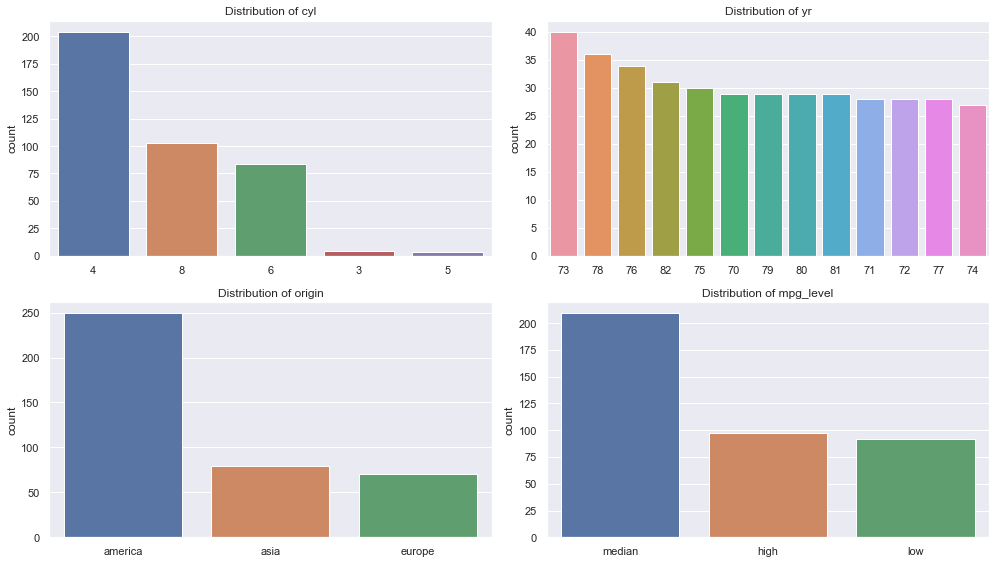

In [16]:
#plot cat variable
fig=plt.figure(1,(14,8))

for i,car in enumerate(car_cat.columns):
    ax=plt.subplot(2,2,i+1)
    sns.countplot(car_cat[car],order=car_cat[car].value_counts().index)
    ax.set_xlabel(None)
    ax.set_title(f'Distribution of {car}')
    plt.tight_layout()
    
    
plt.show()    
    

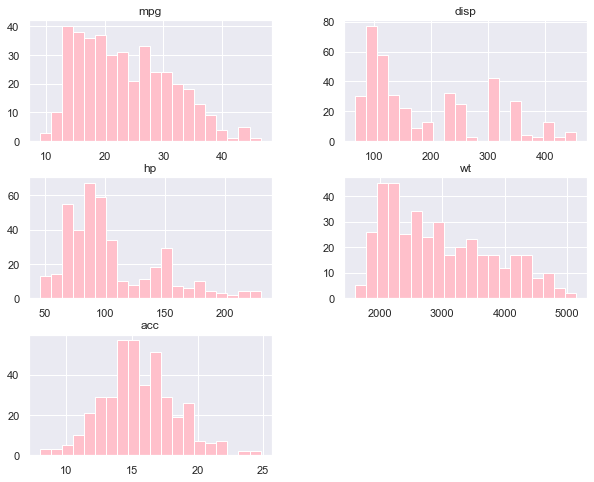

In [17]:
car_num.hist(bins=20,figsize=(10,8),color='pink')
plt.show()

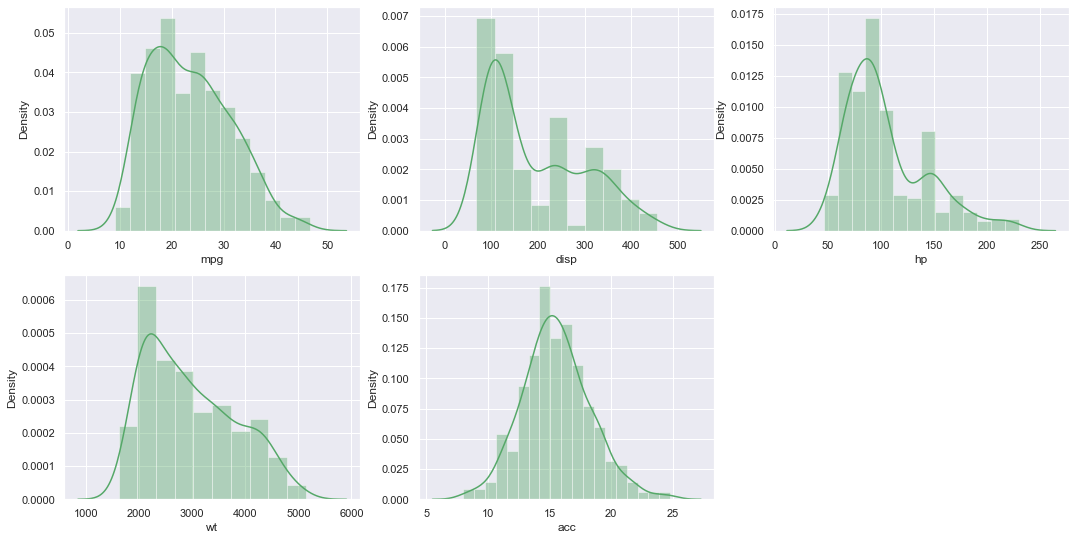

In [18]:
plt.figure(figsize=(18,14))
col=1
for i in car_num.columns:
    plt.subplot(3,3,col)
    sns.distplot(car_num[i],color='g')
    col+=1

In [19]:
car=pd.concat([car_cat,car_num],axis=1)

In [20]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cyl        398 non-null    int64  
 1   yr         398 non-null    int64  
 2   origin     398 non-null    object 
 3   mpg_level  398 non-null    object 
 4   mpg        398 non-null    float64
 5   disp       398 non-null    float64
 6   hp         398 non-null    float64
 7   wt         398 non-null    int64  
 8   acc        398 non-null    float64
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [21]:
car=pd.get_dummies(car,columns=['origin'])

In [22]:
car=pd.get_dummies(car,columns=['mpg_level'])

In [23]:
car.head()

,cyl,yr,mpg,disp,hp,wt,acc,origin_america,origin_asia,origin_europe,mpg_level_high,mpg_level_low,mpg_level_median
0,8,70,18.0,307.0,130.0,3504,12.0,1,0,0,0,0,1
1,8,70,15.0,350.0,165.0,3693,11.5,1,0,0,0,1,0
2,8,70,18.0,318.0,150.0,3436,11.0,1,0,0,0,0,1
3,8,70,16.0,304.0,150.0,3433,12.0,1,0,0,0,1,0
4,8,70,17.0,302.0,140.0,3449,10.5,1,0,0,0,0,1


In [24]:
Hcar=car.copy()
Kcar=car.copy()

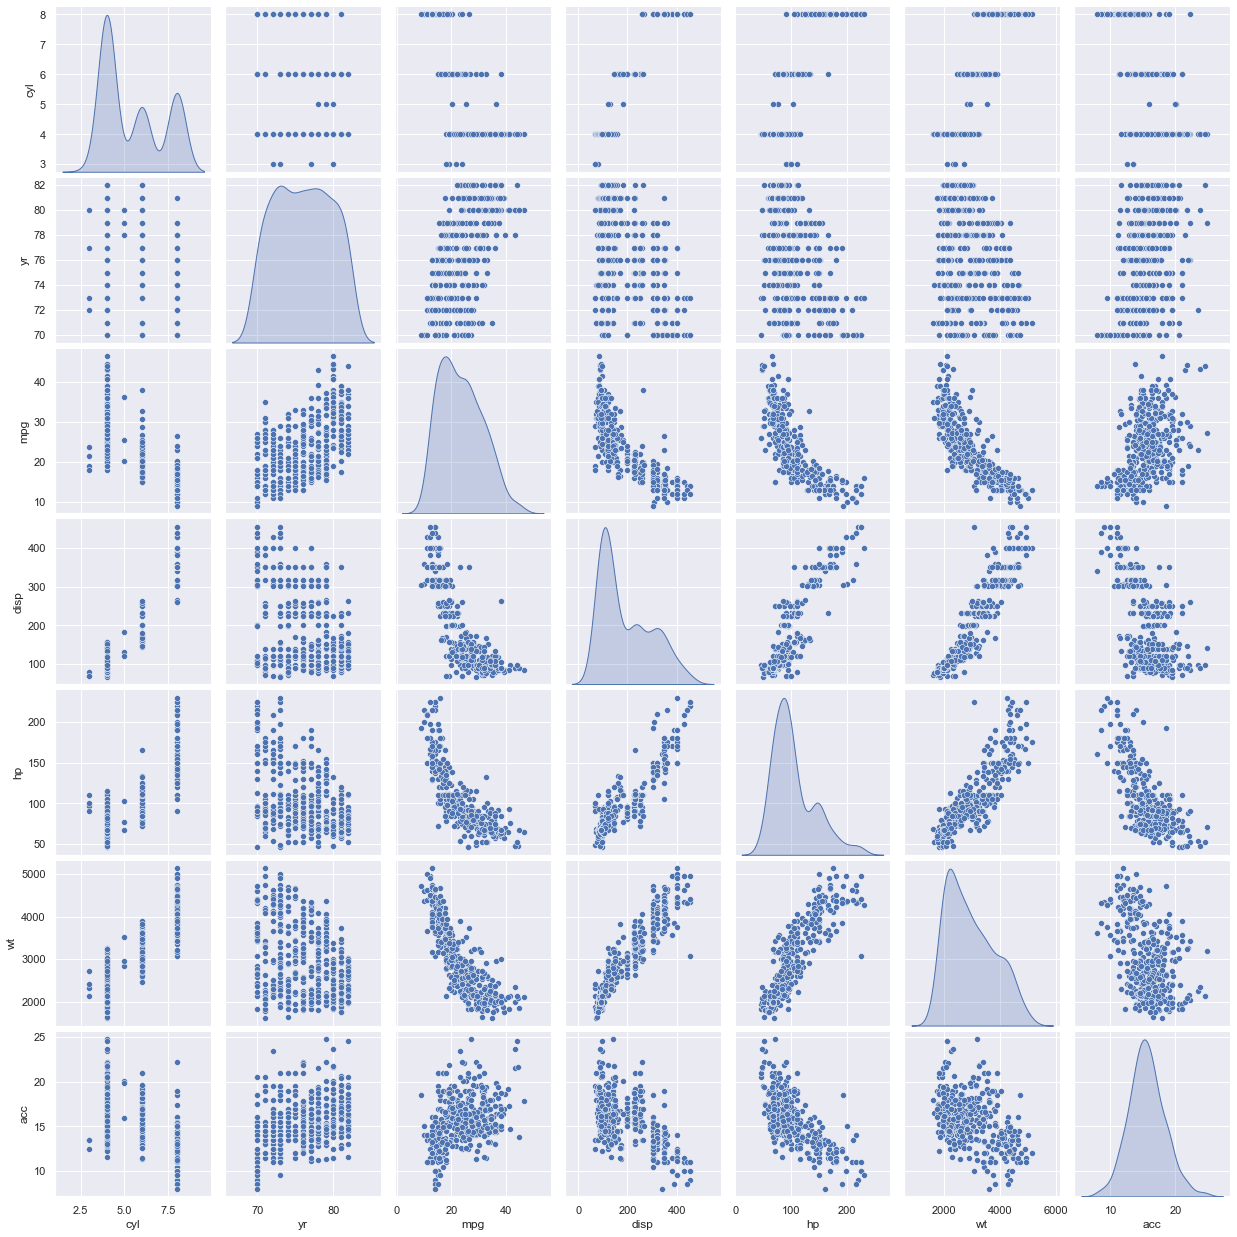

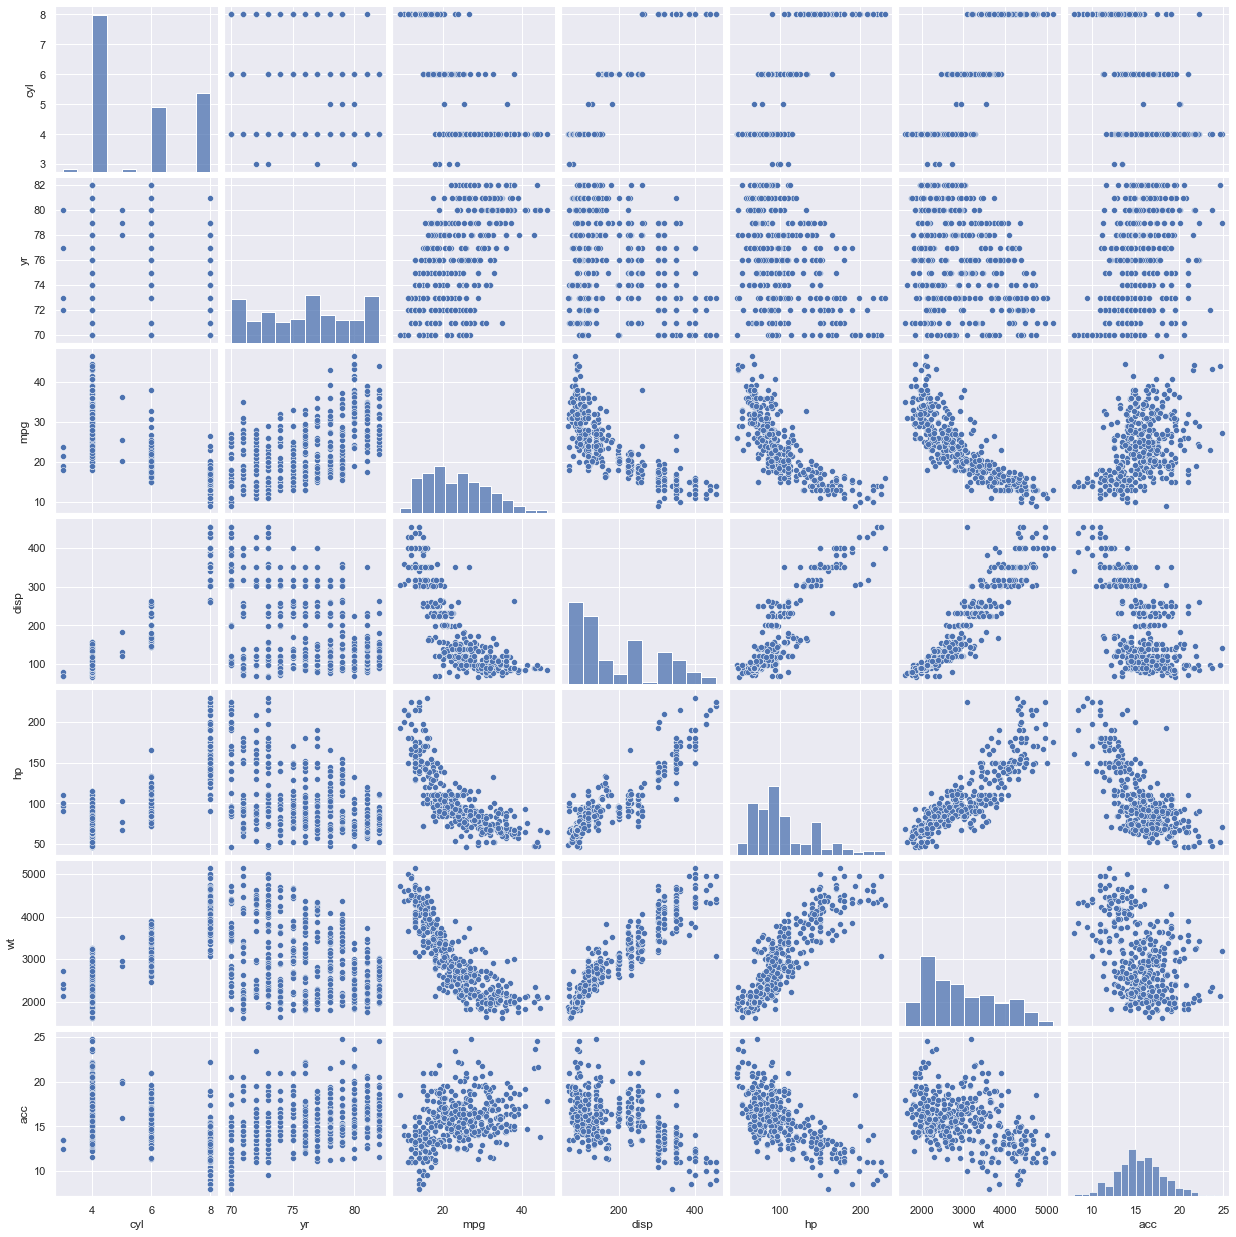

In [25]:
#pair plot for the numeric attributes
car_attr=car.iloc[:,0:7]
sns.pairplot(car_attr,diag_kind='kde')
sns.pairplot(car_attr,diag_kind='hist')

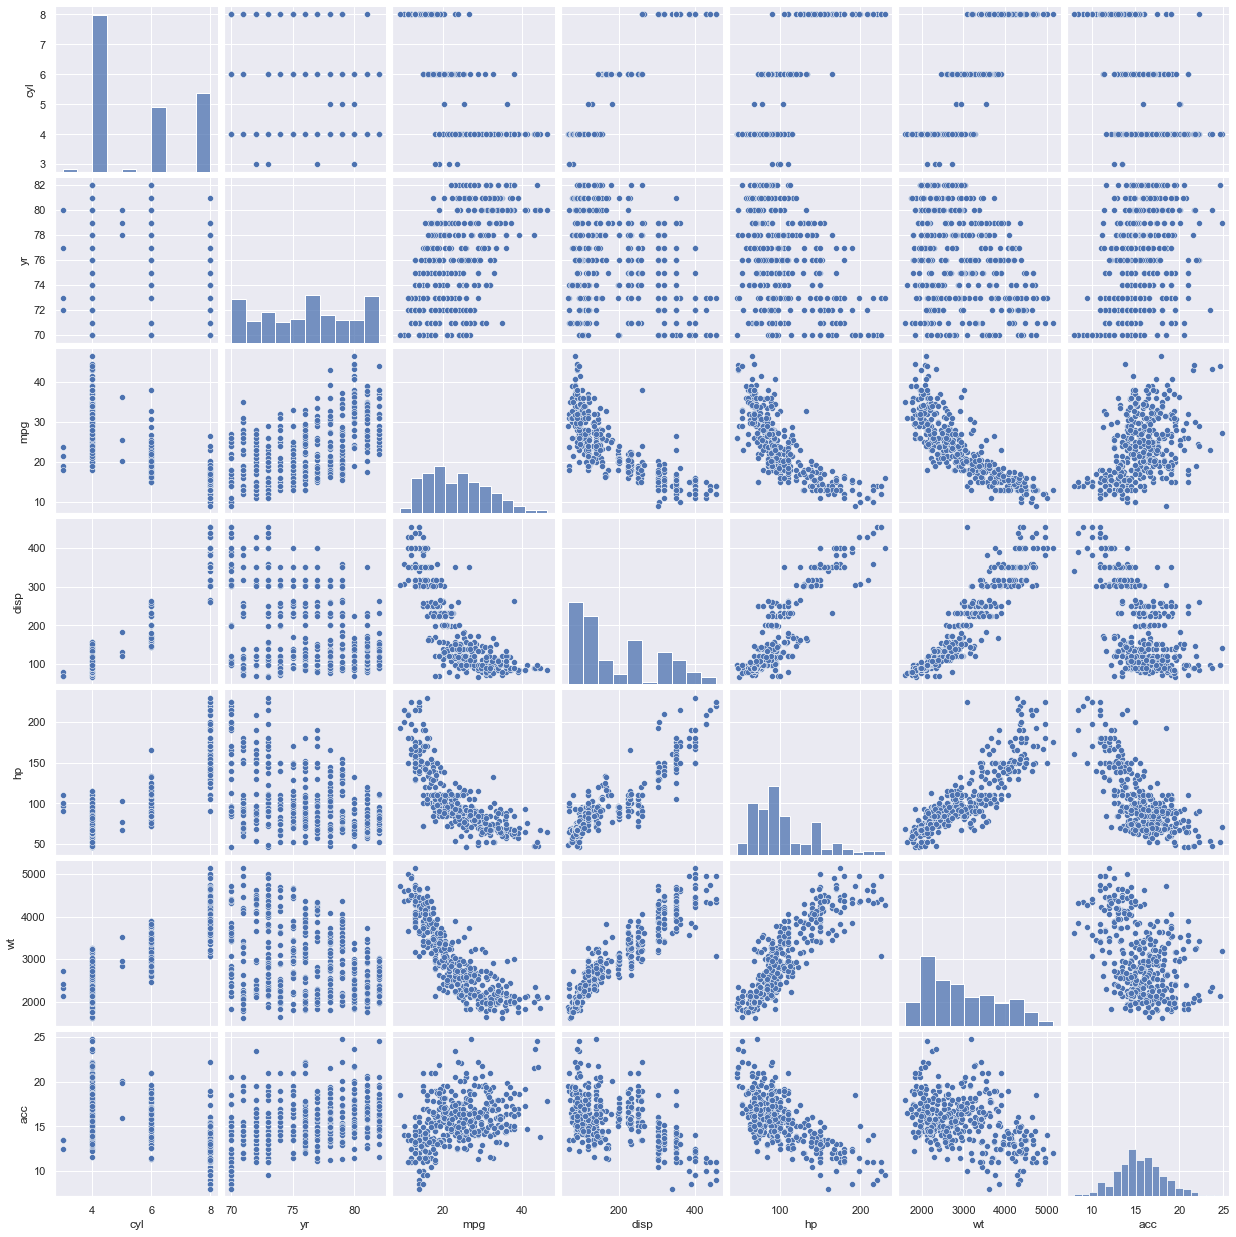

In [26]:
sns.pairplot(car_attr,diag_kind='auto')

In [27]:
#dropping the created dummy variable
car2=car.drop(['origin_america','origin_asia','origin_europe','mpg_level_high','mpg_level_low','mpg_level_median'],axis=1)

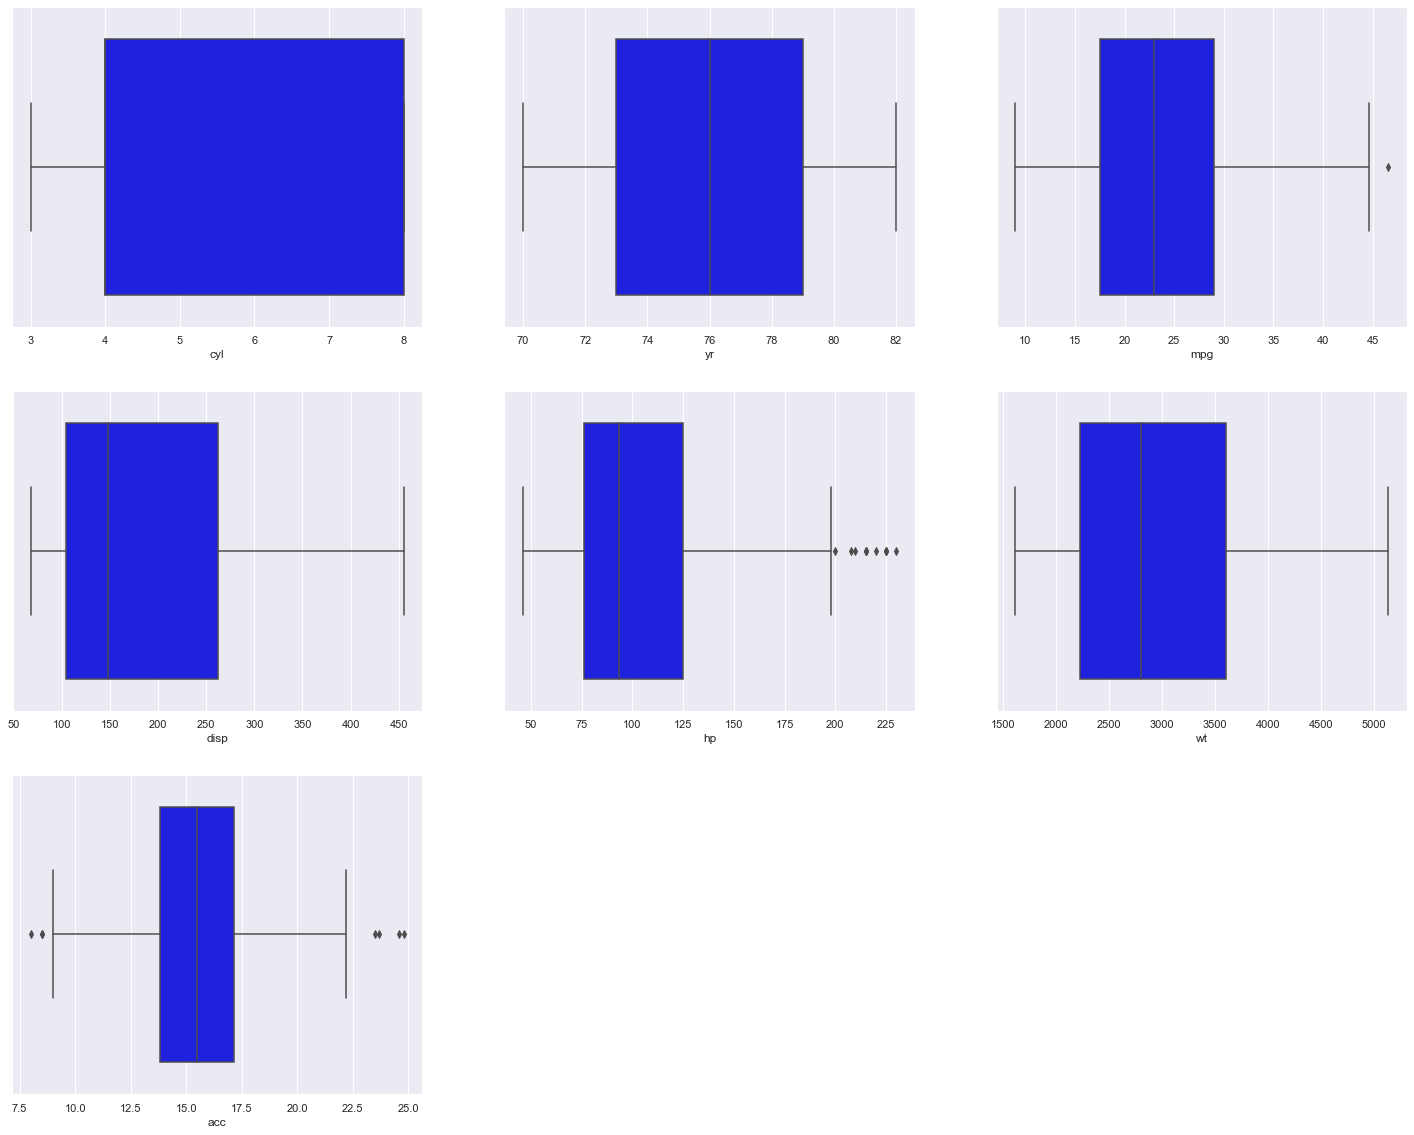

In [28]:
plt.figure(figsize=(25,20))
col = 1
for i in car2.columns:
 plt.subplot(3,3,col)
 sns.boxplot(car2[i],color='blue')
 col +=1

In [29]:
#replacing outliers with IQR (Q1 and Q3 +-1.5*IQR)
IQR1 = stats.iqr(car2['hp'], interpolation = 'midpoint')
IQR2 = stats.iqr(car2['acc'], interpolation = 'midpoint')

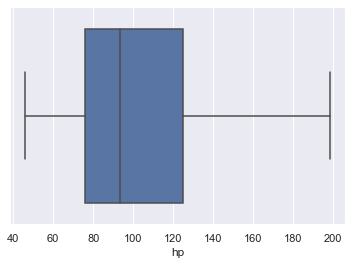

In [30]:
Q3 = car2['hp'].quantile(0.75)
car2['hp'] = np.where(car2["hp"] >(Q3+1.5*IQR1), 198.5,car2['hp'])
sns.boxplot(car2['hp']);

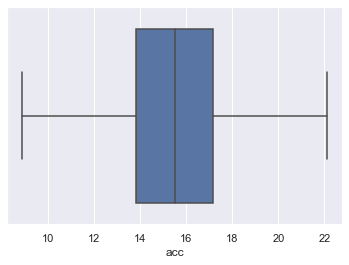

In [31]:
Q1 = car2['acc'].quantile(0.25)
Q31=car2['acc'].quantile(0.75)
car2['acc'] = np.where(car2["acc"] >(Q31+1.5*IQR2),22.10 ,car2['acc'])
car2['acc'] = np.where(car2["acc"] <(Q1-1.5*IQR2),(Q1-
1.5*IQR2),car2['acc'])
sns.boxplot(car2['acc']);

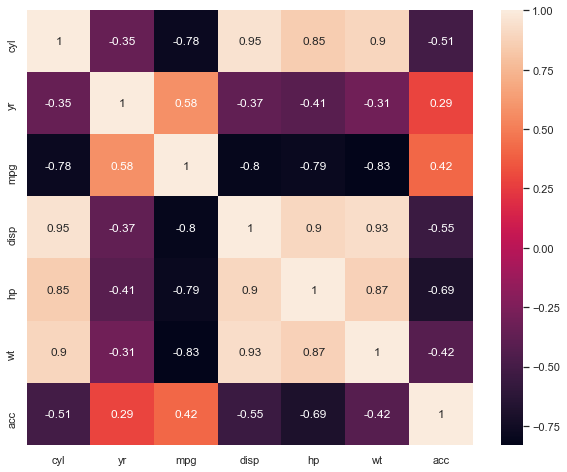

In [32]:
#checking for correlation
plt.figure(figsize=(10,8))
corr=car2.corr()
sns.heatmap(corr,annot=True);

Heirarchical Clustering

In [33]:
#separating numeric variables
cc = car.iloc[:,0:7]
cc.head()

,cyl,yr,mpg,disp,hp,wt,acc
0,8,70,18.0,307.0,130.0,3504,12.0
1,8,70,15.0,350.0,165.0,3693,11.5
2,8,70,18.0,318.0,150.0,3436,11.0
3,8,70,16.0,304.0,150.0,3433,12.0
4,8,70,17.0,302.0,140.0,3449,10.5


In [34]:
cc_z = cc.apply(zscore)
cc_z.head()

,cyl,yr,mpg,disp,hp,wt,acc
0,1.498191,-1.627426,-0.706439,1.090604,0.673118,0.630870,-1.295498
1,1.498191,-1.627426,-1.090751,1.503514,1.589958,0.854333,-1.477038
2,1.498191,-1.627426,-0.706439,1.196232,1.197027,0.550470,-1.658577
3,1.498191,-1.627426,-0.962647,1.061796,1.197027,0.546923,-1.295498
4,1.498191,-1.627426,-0.834543,1.042591,0.935072,0.565841,-1.840117


In [35]:
link_method = linkage(cc_z.iloc[:,0:7], method = 'average')

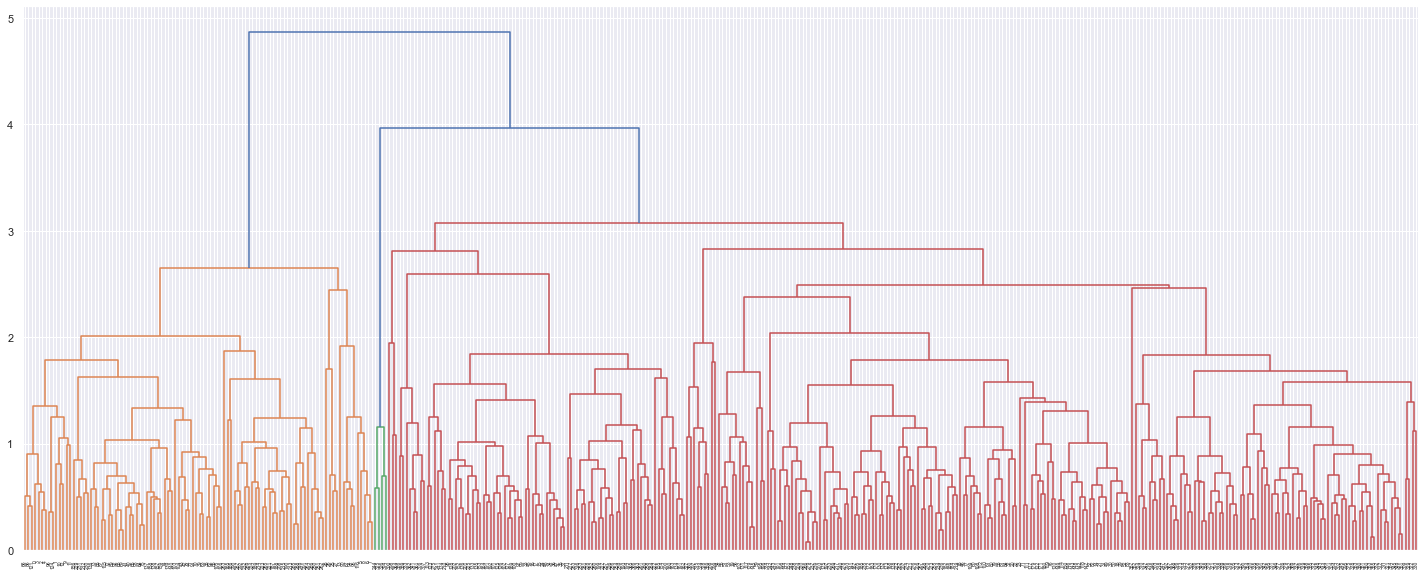

In [36]:
#plotting the H-cluster
plt.figure(figsize=(25, 10))
dendrogram(link_method)
plt.show()

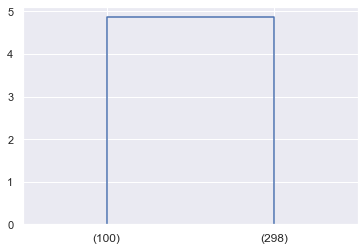

In [37]:
# dendrogram function to arrive at dendrogram
dendrogram(
 link_method,
 truncate_mode='lastp',
 p=2,
)
plt.show()

In [38]:
#vieweing the clusters formed
clusters = fcluster(link_method, 2, criterion='maxclust')
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,

In [39]:
cc_z['clusters_H'] = clusters
cc_z.head()

,cyl,yr,mpg,disp,hp,wt,acc,clusters_H
0,1.498191,-1.627426,-0.706439,1.090604,0.673118,0.630870,-1.295498,1
1,1.498191,-1.627426,-1.090751,1.503514,1.589958,0.854333,-1.477038,1
2,1.498191,-1.627426,-0.706439,1.196232,1.197027,0.550470,-1.658577,1
3,1.498191,-1.627426,-0.962647,1.061796,1.197027,0.546923,-1.295498,1
4,1.498191,-1.627426,-0.834543,1.042591,0.935072,0.565841,-1.840117,1


In [40]:
#attaching the clusters formed to the scales data
cc_z.clusters_H.value_counts().sort_index()

1    100
2    298
Name: clusters_H, dtype: int64

In [41]:
cc['clusters_H']=clusters
Hcar['clusters_H']=clusters
cc.head()

,cyl,yr,mpg,disp,hp,wt,acc,clusters_H
0,8,70,18.0,307.0,130.0,3504,12.0,1
1,8,70,15.0,350.0,165.0,3693,11.5,1
2,8,70,18.0,318.0,150.0,3436,11.0,1
3,8,70,16.0,304.0,150.0,3433,12.0,1
4,8,70,17.0,302.0,140.0,3449,10.5,1


In [42]:
#create a new data set named Hclus
Hclus=cc
Hclus.head()

,cyl,yr,mpg,disp,hp,wt,acc,clusters_H
0,8,70,18.0,307.0,130.0,3504,12.0,1
1,8,70,15.0,350.0,165.0,3693,11.5,1
2,8,70,18.0,318.0,150.0,3436,11.0,1
3,8,70,16.0,304.0,150.0,3433,12.0,1
4,8,70,17.0,302.0,140.0,3449,10.5,1


In [43]:
aggdata=cc.iloc[:,0:8].groupby('clusters_H').mean()
aggdata['Freq']=cc.clusters_H.value_counts().sort_index()
aggdata

,cyl,yr,mpg,disp,hp,wt,acc,Freq
clusters_H,,,,,,,,
1,7.980000,73.740000,14.684000,345.470000,160.400000,4121.560000,12.702000,100
2,4.607383,76.771812,26.477852,142.404362,85.479866,2584.137584,16.529866,298


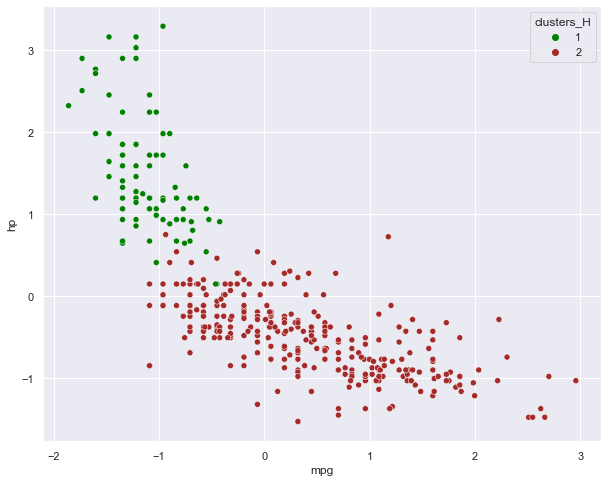

In [44]:
#plotting the clusters formed
plt.figure(figsize=(10, 8))
sns.scatterplot(x="mpg", y="hp", hue="clusters_H",data=cc_z,palette=['green','brown']);

K-Means Clustering

In [45]:
#seperating the numeric values
cc = car.iloc[:,0:7]
cc_z1 = cc.apply(zscore)
cc_z1.head()

,cyl,yr,mpg,disp,hp,wt,acc
0,1.498191,-1.627426,-0.706439,1.090604,0.673118,0.630870,-1.295498
1,1.498191,-1.627426,-1.090751,1.503514,1.589958,0.854333,-1.477038
2,1.498191,-1.627426,-0.706439,1.196232,1.197027,0.550470,-1.658577
3,1.498191,-1.627426,-0.962647,1.061796,1.197027,0.546923,-1.295498
4,1.498191,-1.627426,-0.834543,1.042591,0.935072,0.565841,-1.840117


In [46]:
#calculatint the within sum of squares
wss =[]
for i in range(1,5):
 KM = KMeans(n_clusters=i)
 KM.fit(cc_z1)
 wss.append(KM.inertia_)
wss

[2785.9999999999995, 1294.8418950727323, 946.019790855379, 738.3923281527318]

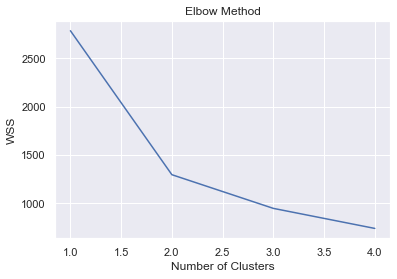

In [47]:
#plotting the WSS against the number of cluster to come up with optimal number of clusters using Elbow-method
plt.plot(range(1,5), wss);
plt.title('Elbow Method');
plt.xlabel("Number of Clusters")
plt.ylabel("WSS");

In [48]:
k_means = KMeans(n_clusters = 2)
k_means.fit(cc_z1)
labels = k_means.labels_

In [49]:
silhouette_score(cc_z1,labels)

0.48235946103916116

In [50]:
#calculating silhouette score for different centroids
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"max_iter": 300,
"random_state": 42,

}

silhouette_coefficients = []

In [51]:
for k in range(2, 7):
 kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
 kmeans.fit(cc_z1)
 score = silhouette_score(cc_z1,kmeans.labels_)
 silhouette_coefficients.append(score)

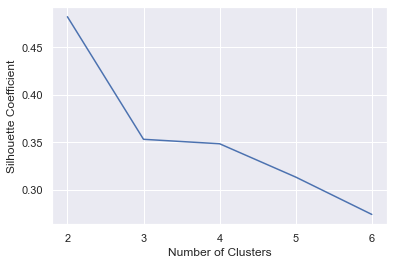

In [52]:
#plotting silhouette score for different centroids
plt.plot(range(2, 7), silhouette_coefficients)
plt.xticks(range(2, 7))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [53]:
#attaching the labels to the datasets
cc["cluster_K"] = labels
Kcar['cluster_K']=labels
Kclus=cc
Kclus.head()

,cyl,yr,mpg,disp,hp,wt,acc,cluster_K
0,8,70,18.0,307.0,130.0,3504,12.0,0
1,8,70,15.0,350.0,165.0,3693,11.5,0
2,8,70,18.0,318.0,150.0,3436,11.0,0
3,8,70,16.0,304.0,150.0,3433,12.0,0
4,8,70,17.0,302.0,140.0,3449,10.5,0


In [54]:
cc.cluster_K.value_counts().sort_index()

0    105
1    293
Name: cluster_K, dtype: int64

In [55]:
cc_z1["cluster_K"] = labels
cc_z1.head()

,cyl,yr,mpg,disp,hp,wt,acc,cluster_K
0,1.498191,-1.627426,-0.706439,1.090604,0.673118,0.630870,-1.295498,0
1,1.498191,-1.627426,-1.090751,1.503514,1.589958,0.854333,-1.477038,0
2,1.498191,-1.627426,-0.706439,1.196232,1.197027,0.550470,-1.658577,0
3,1.498191,-1.627426,-0.962647,1.061796,1.197027,0.546923,-1.295498,0
4,1.498191,-1.627426,-0.834543,1.042591,0.935072,0.565841,-1.840117,0


In [56]:
aggdata=cc.iloc[:,0:8].groupby('cluster_K').mean()
aggdata['Freq']=cc.cluster_K.value_counts().sort_index()
aggdata

,cyl,yr,mpg,disp,hp,wt,acc,Freq
cluster_K,,,,,,,,
0,7.923810,73.742857,14.851429,341.809524,158.000000,4093.771429,12.867619,105
1,4.569966,76.822526,26.619113,140.250853,85.061433,2567.860068,16.535836,293


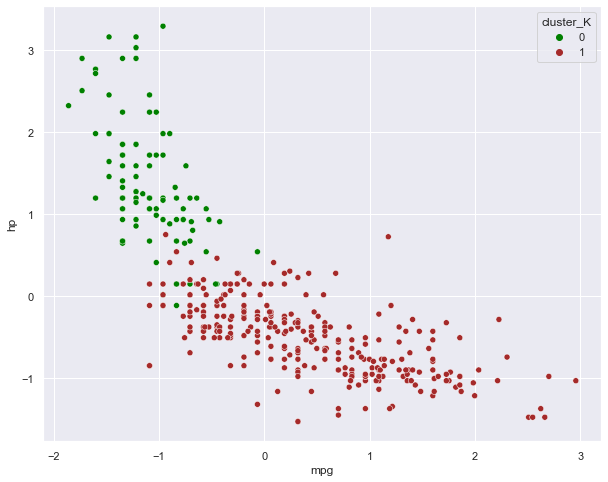

In [57]:
#plotting the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x="mpg", y="hp", hue="cluster_K",
data=cc_z1,
palette=['green','brown']);

In [58]:
Hcar.clusters_H.value_counts().sort_index()

1    100
2    298
Name: clusters_H, dtype: int64

In [59]:
Kcar.cluster_K.value_counts().sort_index()

0    105
1    293
Name: cluster_K, dtype: int64

In [60]:
Hcar.shape

(398, 14)

In [61]:
Kcar.shape

(398, 14)

In [62]:
car.head()

,cyl,yr,mpg,disp,hp,wt,acc,origin_america,origin_asia,origin_europe,mpg_level_high,mpg_level_low,mpg_level_median
0,8,70,18.0,307.0,130.0,3504,12.0,1,0,0,0,0,1
1,8,70,15.0,350.0,165.0,3693,11.5,1,0,0,0,1,0
2,8,70,18.0,318.0,150.0,3436,11.0,1,0,0,0,0,1
3,8,70,16.0,304.0,150.0,3433,12.0,1,0,0,0,1,0
4,8,70,17.0,302.0,140.0,3449,10.5,1,0,0,0,0,1


Linear regression on the original dataset

In [63]:
X = car.drop(['mpg','origin_europe','mpg_level_low'], axis=1)

In [64]:
y = car[['mpg']]

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.30, random_state=15)
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)
LinearRegression()

LinearRegression()

In [66]:
for idx, col_name in enumerate(X_train.columns):
 print("The coefficient for {} is {}".format(col_name,
regression_model.coef_[0][idx]))

The coefficient for cyl is -0.5134441386218385
The coefficient for yr is 0.44346504291168337
The coefficient for disp is 0.010688858394646908
The coefficient for hp is 0.010315514536314019
The coefficient for wt is -0.004538788568737129
The coefficient for acc is 0.19183425608862725
The coefficient for origin_america is -1.7306209513688977
The coefficient for origin_asia is -0.8976724344009391
The coefficient for mpg_level_high is 8.552374663817035
The coefficient for mpg_level_median is 1.5941218694850414


In [67]:
intercept = regression_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is -1.663571756865423


In [68]:
V=regression_model.score(X_train, y_train)
V

0.8967703023839787

Linear regression on data with K means cluster

In [69]:
Kcar['cluster_K']=Kcar['cluster_K'].astype('category')
Kcar['cluster_K'] = Kcar['cluster_K'].replace({1: 'heavy', 0:
'light'})
Kcar = pd.get_dummies(Kcar, columns=['cluster_K'])

In [70]:
Kcar.head()

,cyl,yr,mpg,disp,hp,wt,acc,origin_america,origin_asia,origin_europe,mpg_level_high,mpg_level_low,mpg_level_median,cluster_K_heavy,cluster_K_light
0,8,70,18.0,307.0,130.0,3504,12.0,1,0,0,0,0,1,0,1
1,8,70,15.0,350.0,165.0,3693,11.5,1,0,0,0,1,0,0,1
2,8,70,18.0,318.0,150.0,3436,11.0,1,0,0,0,0,1,0,1
3,8,70,16.0,304.0,150.0,3433,12.0,1,0,0,0,1,0,0,1
4,8,70,17.0,302.0,140.0,3449,10.5,1,0,0,0,0,1,0,1


In [71]:
X = Kcar.drop(['mpg','origin_europe','mpg_level_low','cluster_K_light'],
axis=1)

In [72]:
y = Kcar[['mpg']]

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.30, random_state=12)
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)
LinearRegression()

LinearRegression()

In [74]:
for idx, col_name in enumerate(X_train.columns):
 print("The coefficient for {} is {}".format(col_name,regression_model.coef_[0][idx]))

The coefficient for cyl is -1.1945995644778
The coefficient for yr is 0.4318651041505994
The coefficient for disp is 0.01747749627911041
The coefficient for hp is -0.010138045835905619
The coefficient for wt is -0.0040684301693864056
The coefficient for acc is 0.1856482874625008
The coefficient for origin_america is -1.6918315494304075
The coefficient for origin_asia is -0.7407779192303029
The coefficient for mpg_level_high is 9.283120939156875
The coefficient for mpg_level_median is 2.2500017142312454
The coefficient for cluster_K_heavy is -2.5115140143384753


In [75]:
intercept = regression_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is 3.715660821055735


In [76]:
regression_model.score(X_train, y_train)

0.8942370456543635

In [77]:
K=regression_model.score(X_test, y_test)

In [78]:
K

0.9117893808052381

Linear regression on data with H-clusters

In [80]:
Hcar['clusters_H']=Hcar['clusters_H'].astype('category')
Hcar['clusters_H']=Hcar['clusters_H'].replace({1:'heavy', 2:'light'})
Hcar = pd.get_dummies(Hcar,columns=['clusters_H'])
Hcar.head()

,cyl,yr,mpg,disp,hp,wt,acc,origin_america,origin_asia,origin_europe,mpg_level_high,mpg_level_low,mpg_level_median,clusters_H_heavy,clusters_H_light
0,8,70,18.0,307.0,130.0,3504,12.0,1,0,0,0,0,1,1,0
1,8,70,15.0,350.0,165.0,3693,11.5,1,0,0,0,1,0,1,0
2,8,70,18.0,318.0,150.0,3436,11.0,1,0,0,0,0,1,1,0
3,8,70,16.0,304.0,150.0,3433,12.0,1,0,0,0,1,0,1,0
4,8,70,17.0,302.0,140.0,3449,10.5,1,0,0,0,0,1,1,0


In [81]:
X = Hcar.drop(['mpg','origin_europe','mpg_level_low','clusters_H_light'],axis=1)

In [82]:
y = Hcar[['mpg']]

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.30, random_state=10)
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)
LinearRegression()

LinearRegression()

In [84]:
for idx, col_name in enumerate(X_train.columns):
 print("The coefficient for {} is {}".format(col_name,
regression_model.coef_[0][idx]))

The coefficient for cyl is -1.0104832432577142
The coefficient for yr is 0.4475417357550146
The coefficient for disp is 0.01511520052461407
The coefficient for hp is -0.013301584387234512
The coefficient for wt is -0.004264179780672395
The coefficient for acc is 0.11805139164484812
The coefficient for origin_america is -2.1174569315391127
The coefficient for origin_asia is -1.3974915348558072
The coefficient for mpg_level_high is 8.565948239298272
The coefficient for mpg_level_median is 1.6577250698582815
The coefficient for clusters_H_heavy is 2.038974468807401


In [85]:
intercept = regression_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is 2.5727293182332573


In [86]:
regression_model.score(X_train, y_train)

0.8988409890950728

In [87]:
H=regression_model.score(X_test, y_test)
H

0.9010238373846695

In [88]:
modellists = []
modellists.append(['Linear Regression on Original Data set', V*100])
modellists.append(['Linear Regression with K means clusters', K*100])
modellists.append(['Linear Regression with Heirarchical clusters',H*100])
mdl_df = pd.DataFrame(modellists, columns = ['Model','r^2 on Test'])
mdl_df

,Model,r^2 on Test
0,Linear Regression on Original Data set,89.677030
1,Linear Regression with K means clusters,91.178938
2,Linear Regression with Heirarchical clusters,90.102384
